<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_066_predict_employess_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Employess Turnover

## Data Preprocessing

In [1]:
import pandas as pd

hr = pd.read_csv('HR_comma_sep.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("Sample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Rename column name from "sales" to "department"

In [0]:
hr=hr.rename(columns = {'sales':'department'})

The type of the columns can be found out as follows:

In [3]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [4]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

Our data is prett clean, no missing value

In [5]:
hr.shape

(14999, 10)

The data contains 14,999 employees and 10 features.

The "left" column is the outcome variable recoding 1 and 0. 1 for employee who left the company and 0 for those who didn't.

The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

In [6]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine "technical","support" and "IT" together and call them "technical".

In [0]:
import numpy as np

hr['department'] = np.where(hr['department'] == 'support','technical',hr['department'])
hr['department'] = np.where(hr['department'] == 'IT','technical',hr['department'])

After the change, this is how the department categories look:

In [8]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

## Data Exploration

First of all, let us find out the number of employees who left the company anf those who didn't left.

In [9]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

There are 3,571 employees left and 11,428 employees stayed in our data.

Let us get a sense of the numbers across there two classes:

In [10]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Serveral observations:

   * The average satisfaction level of employees who stayed with the company is higher tha that of the employees who left.
   * The average monthly work hours of employees who left the company is more than that of the employees who stayed.
   * The employees who had workplace accidents are less likely to stayed than that of the employee who did not have workplace accidents.
   * The employees who were promoted in the last five years are less likely to stayed than those who did not get a promotion in the last five years.
   
We can calculate categorical means for categorical variable such as department and salary to get more detailed sense of our data like so:

In [11]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [12]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


## Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

***Bar chart for department employee work for and the frequency of turnover***

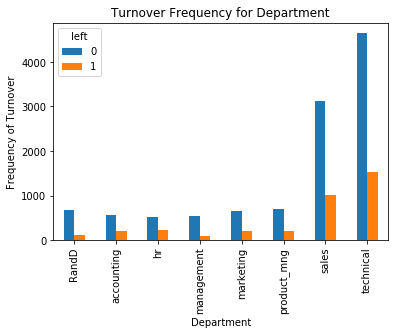

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.crosstab(hr.department, hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')
plt.show()

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

***Bar chart for employee salary level and the frequency of turnover***

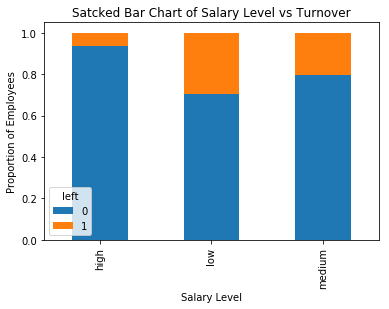

In [16]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Satcked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')
tplt.show()

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

Histograms are often one of the most helpful tools we can use for numeric variable during the exploratory phrase.

*** Histogram of numeric variable***

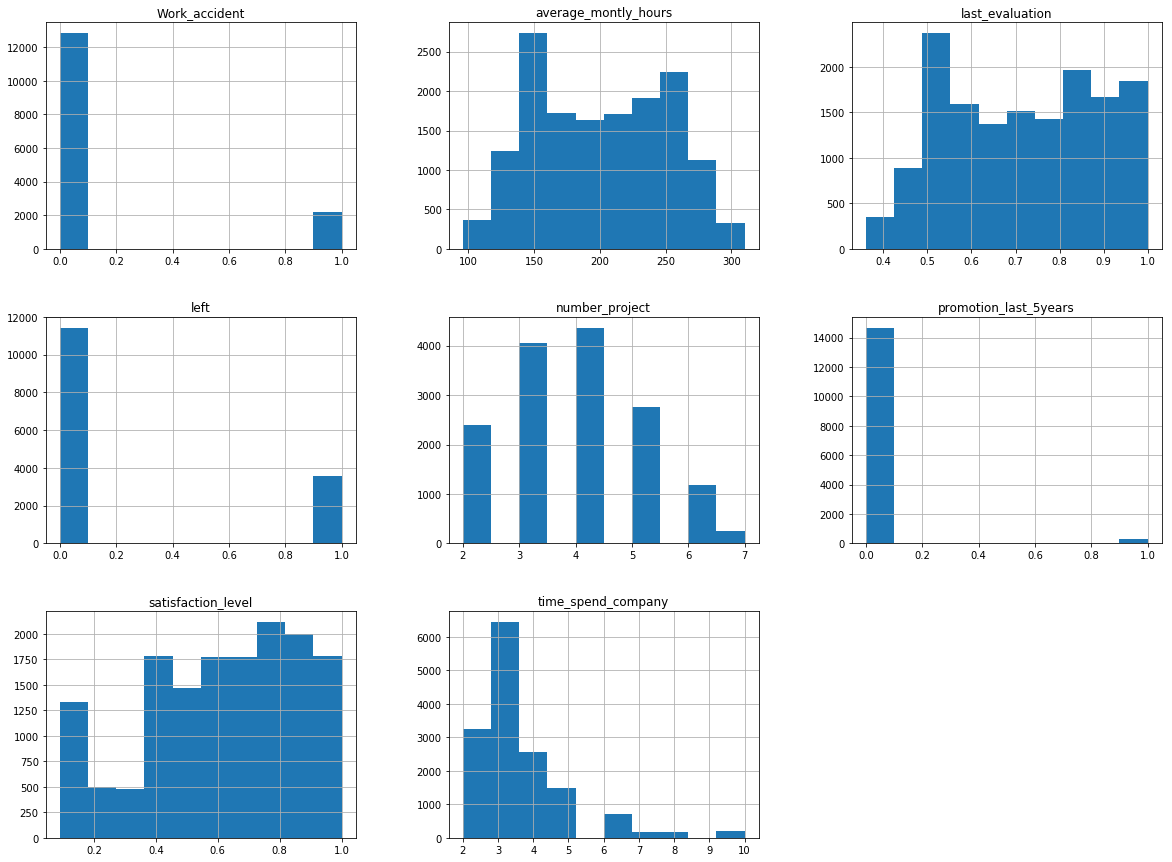

In [17]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig('hr_histogram_plots')
plt.show()

## Creating Dummy Variable for Categorical Variables

There are two categorical variables (dapartment, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [0]:
cat_vars=['department','salary']
for var in cat_vars:
  cat_list = 'var'+'_'+var
  cat_list = pd.get_dummies(hr[var],prefix=var)
  hr1=hr.join(cat_list)
  hr=hr1

The actual categorical variable needs to be removed once the dummy variable have been created.

Column names after creating dummy variables for categorical variables:

In [19]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [21]:
hr.drop(hr.columns[[8,9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

The outcome variable is "left", and all the other variables are predictors.

In [0]:
hr_vars = hr.columns.values.tolist()
y = ['left']
X = [i for i in hr_vars if i not in y]

## Feature Selection

The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variable that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

Let's use feature selection to help us decide which variable are significant that can predict employee turnover with great accuracy.

There are total 18 columns in X, how about select 10?

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model,10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs'

[ True  True False False  True  True  True  True  True False False False
 False  True  True  True]
[1 1 2 7 1 1 1 1 1 4 6 5 3 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


You can see that RFE chose the 10 variables for us, which are marked True in the *support_* array and marked with a choice "1" in the *ranking_* array. 

In [0]:
cols = ['satisfaction_level','last_evaluation','time_spend_company','Work_accident','promotion_last_5years','department_hr', 'salary_high', 'salary_low',
       'salary_medium']
X = hr[cols]
y = hr['left']

## Model

### Logistic Regression Model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy:{:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic regression accuracy:0.770


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
print('Random Forest accuracy:{:.3f}'.format(accuracy_score(y_test,rf.predict(X_test))))

Random Forest accuracy:0.976


### Support Vector Machine

In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
print('Support Vector Machnine accuracy:{:.3f}'.format(accuracy_score(y_test,svc.predict(X_test))))

Support Vector Machnine accuracy:0.912


The winner is ***Random forest***, right?

## Cross Validation


Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross Validation to train our Random Forest model.

In [35]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print('10-fold cross validation average accuracy: %.3f' %(results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

10-fold cross validation average accuracy: 0.979


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The average accuracy remains very close to the Random Forest model accuracy; hence, we can conclude that the model generalizes well.

## Precision and Recall

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.